In [157]:
import pandas as pd

In [158]:
import numpy as np

In [159]:
import matplotlib.pyplot as plt

In [160]:
import nltk

In [161]:
from nltk.corpus import stopwords

In [162]:
from nltk.stem import WordNetLemmatizer, PorterStemmer

In [163]:
from nltk.tokenize import word_tokenize

In [164]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [165]:
from gensim.models import Word2Vec

In [166]:
from sklearn.metrics.pairwise import cosine_similarity

In [167]:
from collections import Counter

In [168]:
import re

In [169]:
import pandas as pd
df = pd.read_csv("C:/Users/G√ºlnur/Desktop/kadin_giyim_urunleri.csv", encoding='utf-8')
df.head(100 )

Kategori                        √úr√ºn Adƒ±        Renk    Bel Tipi  \
0   Pantolon    Y√ºksek Bel D√ºz Pa√ßa Pantolon        Krem    Orta Bel   
1   Pantolon    Y√ºksek Bel D√ºz Pa√ßa Pantolon  Kahverengi  Y√ºksek Bel   
2   Pantolon      Orta Bel D√ºz Pa√ßa Pantolon    Lacivert  Y√ºksek Bel   
3   Pantolon    Y√ºksek Bel Bol Pa√ßa Pantolon         Bej  Y√ºksek Bel   
4   Pantolon    Orta Bel Geni≈ü Pa√ßa Pantolon    Lacivert    Orta Bel   
..       ...                             ...         ...         ...   
95  Pantolon      Orta Bel D√ºz Pa√ßa Pantolon    Lacivert    Orta Bel   
96  Pantolon    Y√ºksek Bel D√ºz Pa√ßa Pantolon         Gri    Orta Bel   
97  Pantolon      Orta Bel D√ºz Pa√ßa Pantolon  Kahverengi    Orta Bel   
98  Pantolon      Orta Bel Bol Pa√ßa Pantolon  Kahverengi    Orta Bel   
99  Pantolon  Y√ºksek Bel Geni≈ü Pa√ßa Pantolon         Bej    Orta Bel   

   Pa√ßa Tipi      Kuma≈ü          Detay      Kapatma       Cep Bilgisi  \
0   Bol Pa√ßa     Viskon  Diki≈ü Detaylƒ±  Yan Fermuar  Arka Cep Detaylƒ±   
1   D√ºz Pa√ßa     Dokuma         Biyeli  Yan Fermuar  Arka Cep Detaylƒ±   
2   Bol Pa√ßa     Viskon  Diki≈ü Detaylƒ±  Yan Fermuar       ƒ∞ki Yan Cep   
3   D√ºz Pa√ßa  Polyester        Minimal  Yan Fermuar       ƒ∞ki Yan Cep   
4   Bol Pa√ßa      Keten         Pileli      D√ºƒümeli  Arka Cep Detaylƒ±   
..       ...        ...            ...          ...               ...   
95  Bol Pa√ßa  Polyester  Diki≈ü Detaylƒ±     Lastikli            Cepsiz   
96  Bol Pa√ßa  Polyester        Minimal     Lastikli       ƒ∞ki Yan Cep   
97  Bol Pa√ßa    Pamuklu         Pileli  Yan Fermuar       ƒ∞ki Yan Cep   
98  D√ºz Pa√ßa     Dokuma        Ku≈üaklƒ±  Yan Fermuar  Arka Cep Detaylƒ±   
99  Bol Pa√ßa     Viskon        Minimal      D√ºƒümeli  Arka Cep Detaylƒ±   

                           Stil √ñnerisi           Kalƒ±p  
0   Sneaker ve ti≈ü√∂rtle g√ºnl√ºk kullanƒ±m       Dar Kalƒ±p  
1     G√∂mlek ve topuklu ile ofise uygun       Dar Kalƒ±p  
2           Triko kazakla kƒ±≈ülƒ±k kombin     Rahat Kalƒ±p  
3     G√∂mlek ve topuklu ile ofise uygun     Rahat Kalƒ±p  
4           Triko kazakla kƒ±≈ülƒ±k kombin     Rahat Kalƒ±p  
..                                  ...             ...  
95            Blazer ceketle ≈üƒ±k kombin  Standart Kalƒ±p  
96             Crop top ile modern stil  Standart Kalƒ±p  
97    G√∂mlek ve topuklu ile ofise uygun     Rahat Kalƒ±p  
98  Sneaker ve ti≈ü√∂rtle g√ºnl√ºk kullanƒ±m  Standart Kalƒ±p  
99            Blazer ceketle ≈üƒ±k kombin     Rahat Kalƒ±p  

[100 rows x 11 columns]

In [170]:
renk = df['Renk'].str.lower().str.split()

In [171]:
print("S√ºtunlar:", df.columns.tolist())

S√ºtunlar: ['Kategori', '√úr√ºn Adƒ±', 'Renk', 'Bel Tipi', 'Pa√ßa Tipi', 'Kuma≈ü', 'Detay', 'Kapatma', 'Cep Bilgisi', 'Stil √ñnerisi', 'Kalƒ±p']


In [172]:
!pip help install


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

Description:
  Install packages from:
  
  - PyPI (and other indexes) using requirement specifiers.
  - VCS project urls.
  - Local project directories.
  - Local or remote source archives.
  
  pip also supports installing from "requirements files", which provide
  an easy way to specify a whole environment to be installed.

Install Options:
  -r, --requirement <file>    Install from the given requirements file. This
                              option can be used multiple times.
  -c, --constraint <file>     Constrain versions using the given constraints
                              file. This option can be used multiple times.
  --no-deps                   Don't install p

In [173]:
renk_listesi = [
    'kƒ±rmƒ±zƒ±', 'mavi', 'ye≈üil', 'sarƒ±', 'siyah', 'beyaz', 'gri', 'mor',
    'turuncu', 'pembe', 'bej', 'kahverengi', 'lacivert', 'bordo', 'altƒ±n', 'g√ºm√º≈ü'
]

color_palette = {
    'kƒ±rmƒ±zƒ±': (255, 0, 0),
    'mavi': (0, 0, 255),
    'ye≈üil': (0, 128, 0),
    'sarƒ±': (255, 255, 0),
    'siyah': (0, 0, 0),
    'beyaz': (255, 255, 255),
    'gri': (128, 128, 128),
    'mor': (128, 0, 128),
    'turuncu': (255, 165, 0),
    'pembe': (255, 192, 203),
    'bej': (245, 245, 220),
    'kahverengi': (165, 42, 42),
    'lacivert': (0, 0, 139),
    'bordo': (128, 0, 32),
    'altƒ±n': (255, 215, 0),
    'g√ºm√º≈ü': (192, 192, 192)
}

In [174]:
def tokenize(text):
    return re.findall(r'\b\w+\b', str(text).lower())

def renk_ayikla(tokens):
    return [tok for tok in tokens if tok in renk_listesi]

In [175]:
df['description'] = df['√úr√ºn Adƒ±'] + ' ' + df['Renk'] + ' ' + df['Stil √ñnerisi']

In [176]:
def tokenize(text):
    return text.lower().split()

In [177]:
def renk_ayikla(tokens):
    renkler_listesi = [
        'siyah', 'beyaz', 'kƒ±rmƒ±zƒ±', 'mavi', 'ye≈üil', 'sarƒ±',
        'kahverengi', 'bej', 'lacivert', 'gri', 'turuncu', 'mor',
        'pembe', 'zeytin', 'bordo', 'ekru'
    ]
    return [token for token in tokens if token in renkler_listesi]

In [178]:
df['tokens'] = df['description'].apply(tokenize)
df['renkler'] = df['tokens'].apply(renk_ayikla)

In [179]:
print(df[['description', 'tokens', 'renkler']].head())

                                         description  \
0  Y√ºksek Bel D√ºz Pa√ßa Pantolon Krem Sneaker ve t...   
1  Y√ºksek Bel D√ºz Pa√ßa Pantolon Kahverengi G√∂mlek...   
2  Orta Bel D√ºz Pa√ßa Pantolon Lacivert Triko kaza...   
3  Y√ºksek Bel Bol Pa√ßa Pantolon Bej G√∂mlek ve top...   
4  Orta Bel Geni≈ü Pa√ßa Pantolon Lacivert Triko ka...   

                                              tokens       renkler  
0  [y√ºksek, bel, d√ºz, pa√ßa, pantolon, krem, sneak...            []  
1  [y√ºksek, bel, d√ºz, pa√ßa, pantolon, kahverengi,...  [kahverengi]  
2  [orta, bel, d√ºz, pa√ßa, pantolon, lacivert, tri...    [lacivert]  
3  [y√ºksek, bel, bol, pa√ßa, pantolon, bej, g√∂mlek...         [bej]  
4  [orta, bel, geni≈ü, pa√ßa, pantolon, lacivert, t...    [lacivert]  


In [180]:
genis_renk_eslestirme = {
    'a√ßƒ±k mavi': 'mavi',
    'koyu mavi': 'mavi',
    'a√ßƒ±k ye≈üil': 'ye≈üil',
    'koyu ye≈üil': 'ye≈üil',
    'a√ßƒ±k pembe': 'pembe',
    'koyu pembe': 'pembe',
    'lacivert': 'mavi',
    'bej': 'bej',
    'krem': 'beyaz',
    'siyah': 'siyah',
    'beyaz': 'beyaz',
    'gri': 'gri',
    'kahverengi': 'kahverengi',
    'zeytin ye≈üili': 'ye≈üil',
    'bordo': 'kƒ±rmƒ±zƒ±',
    'ekru': 'beyaz',
    'mavi': 'mavi',
    'ye≈üil': 'ye≈üil',
    'kƒ±rmƒ±zƒ±': 'kƒ±rmƒ±zƒ±',
    'turuncu': 'turuncu',
    'mor': 'mor',
    'pembe': 'pembe',
    'sarƒ±': 'sarƒ±'
}

In [181]:
def renk_ayikla_genis_ve_kisa(description):
    description = description.lower()
    matched_colors = []

    for renk_ifadesi, temel_renk in genis_renk_eslestirme.items():
        if renk_ifadesi in description:
            matched_colors.append(temel_renk)

    return list(set(matched_colors))

In [182]:
if 'description' not in df.columns:
    df['description'] = df['√úr√ºn Adƒ±'] + ' ' + df['Renk'] + ' ' + df['Stil √ñnerisi']

In [183]:
df['renkler'] = df['description'].apply(renk_ayikla_genis_ve_kisa)

In [184]:
print(df[['description', 'renkler']].head())

                                         description       renkler
0  Y√ºksek Bel D√ºz Pa√ßa Pantolon Krem Sneaker ve t...       [beyaz]
1  Y√ºksek Bel D√ºz Pa√ßa Pantolon Kahverengi G√∂mlek...  [kahverengi]
2  Orta Bel D√ºz Pa√ßa Pantolon Lacivert Triko kaza...        [mavi]
3  Y√ºksek Bel Bol Pa√ßa Pantolon Bej G√∂mlek ve top...         [bej]
4  Orta Bel Geni≈ü Pa√ßa Pantolon Lacivert Triko ka...        [mavi]


In [185]:
pip install pandas gensim scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [186]:
from gensim.models import Word2Vec

In [187]:
descriptions = df['description'].apply(tokenize)

In [188]:
model = Word2Vec(sentences=descriptions, vector_size=100, window=5, min_count=1, workers=4)

In [189]:
word_vector = model.wv['pantolon']

In [190]:
print(word_vector)

[-0.03748853  0.05931719 -0.04615803  0.00572707  0.05743176 -0.10090315
  0.05067069  0.1638476  -0.0918536  -0.11250623 -0.0166147  -0.12191105
 -0.00955458  0.06305717  0.08482777 -0.0865977   0.05112246 -0.00690355
 -0.02451701 -0.13297379  0.04363739  0.03516087  0.08106344 -0.02373026
  0.01974987 -0.00205934 -0.07260679  0.00262814 -0.05105321  0.0297623
  0.09280664 -0.08990817  0.04047932 -0.1564821  -0.03428071  0.10339823
  0.01949509  0.02137862 -0.02060735 -0.10736489 -0.01119519 -0.05970324
 -0.02963166  0.05458191  0.05710921 -0.00999339 -0.07592175 -0.06515166
  0.03994746  0.04724141  0.02068777 -0.06535689 -0.04162805 -0.06166052
 -0.01822909 -0.01466344  0.04547732 -0.05594565 -0.07253364 -0.01483698
  0.02317678 -0.01071342  0.0973083   0.03439705 -0.08863842  0.16085064
  0.01549709  0.13468905 -0.15383857  0.10146376  0.01183002  0.08273374
  0.1229137   0.04024289  0.13476738  0.00039851 -0.00880813  0.04454806
 -0.06140966 -0.0358837  -0.09778586 -0.05317974 -0.

In [191]:
from gensim.models import Word2Vec

In [192]:
descriptions = df['description'].apply(tokenize)

In [193]:
model = Word2Vec(sentences=descriptions, vector_size=100, window=5, min_count=1, workers=4)

In [194]:
word_vector = model.wv['elbise']

In [195]:
print(word_vector)

[-0.0359868   0.0539345  -0.03451698  0.01540062  0.04141029 -0.10034758
  0.05885434  0.15068713 -0.07216884 -0.10691248 -0.01411346 -0.12142661
 -0.01287046  0.04735109  0.07033733 -0.0860599   0.04039342 -0.02531994
 -0.00443847 -0.12330181  0.05745338  0.02729586  0.0706072  -0.01123626
  0.00683696  0.00387766 -0.08050118 -0.00411712 -0.04798863  0.01166569
  0.08684438 -0.07400434  0.05047346 -0.14880209 -0.01884062  0.08742867
  0.02776477  0.02425309 -0.02706983 -0.08911468 -0.00989236 -0.06574474
 -0.02566626  0.04810684  0.04063557 -0.02197045 -0.06349136 -0.05568341
  0.04183497  0.04699326  0.01486265 -0.05610679 -0.02845217 -0.04030525
 -0.01517341 -0.00532637  0.049792   -0.05546552 -0.07161416  0.00113675
  0.02398555 -0.00900681  0.0867639   0.03090616 -0.07909787  0.13646777
  0.00253823  0.12660904 -0.13291758  0.0802958   0.00570389  0.07072382
  0.1174808   0.03336044  0.13933353 -0.00550066 -0.02035128  0.04517132
 -0.05027554 -0.03692794 -0.09697993 -0.04371138 -0

In [196]:
color_palette = {
    'kƒ±rmƒ±zƒ±': [255, 0, 0],
    'ye≈üil': [0, 255, 0],
    'mavi': [0, 0, 255],
    'sarƒ±': [255, 255, 0],
    'beyaz': [255, 255, 255],
    'siyah': [0, 0, 0],
    'gri': [128, 128, 128],
    'bej': [245, 245, 220],
    'krem': [255, 253, 208],
    'lacivert': [0, 0, 128],
    'kahverengi': [139, 69, 19],
    'zeytin ye≈üili': [128, 128, 0],
    'bordo': [128, 0, 0],
    'ekru': [255, 255, 230],
    'a√ßƒ±k mavi': [173, 216, 230],
    'koyu mavi': [0, 0, 139],
    'a√ßƒ±k ye≈üil': [144, 238, 144],
    'koyu ye≈üil': [0, 100, 0],
    'a√ßƒ±k pembe': [255, 182, 193],
    'koyu pembe': [255, 20, 147],
    'turuncu': [255, 165, 0],
    'mor': [128, 0, 128],
    'pembe': [255, 192, 203],
    'sarƒ±': [255, 255, 0]
}

In [197]:
rgb_vectors = {
    renk: np.pad(np.array(rgb), (0, 100 - len(rgb)), 'constant')
    for renk, rgb in color_palette.items()
}

In [198]:
renk_rgb_eslesme = {}
for renk, vec in rgb_vectors.items():
    similarities = {
        rgb_name: cosine_similarity([vec], [rgb_vec])[0][0]
        for rgb_name, rgb_vec in rgb_vectors.items()
    }
    en_yakin_rgb = max(similarities, key=similarities.get)
    renk_rgb_eslesme[renk] = {
        'en_yakin_rgb': en_yakin_rgb,
        'rgb_degeri': color_palette[en_yakin_rgb],
        'benzerlik': similarities[en_yakin_rgb]
    }

In [199]:
for renk, bilgiler in renk_rgb_eslesme.items():
    print(f"{renk}: En yakƒ±n RGB = {bilgiler['en_yakin_rgb']}, "
          f"RGB deƒüeri = {bilgiler['rgb_degeri']}, "
          f"Benzerlik = {bilgiler['benzerlik']:.4f}")

kƒ±rmƒ±zƒ±: En yakƒ±n RGB = kƒ±rmƒ±zƒ±, RGB deƒüeri = [255, 0, 0], Benzerlik = 1.0000
ye≈üil: En yakƒ±n RGB = ye≈üil, RGB deƒüeri = [0, 255, 0], Benzerlik = 1.0000
mavi: En yakƒ±n RGB = mavi, RGB deƒüeri = [0, 0, 255], Benzerlik = 1.0000
sarƒ±: En yakƒ±n RGB = sarƒ±, RGB deƒüeri = [255, 255, 0], Benzerlik = 1.0000
beyaz: En yakƒ±n RGB = beyaz, RGB deƒüeri = [255, 255, 255], Benzerlik = 1.0000
siyah: En yakƒ±n RGB = kƒ±rmƒ±zƒ±, RGB deƒüeri = [255, 0, 0], Benzerlik = 0.0000
gri: En yakƒ±n RGB = gri, RGB deƒüeri = [128, 128, 128], Benzerlik = 1.0000
bej: En yakƒ±n RGB = bej, RGB deƒüeri = [245, 245, 220], Benzerlik = 1.0000
krem: En yakƒ±n RGB = krem, RGB deƒüeri = [255, 253, 208], Benzerlik = 1.0000
lacivert: En yakƒ±n RGB = mavi, RGB deƒüeri = [0, 0, 255], Benzerlik = 1.0000
kahverengi: En yakƒ±n RGB = kahverengi, RGB deƒüeri = [139, 69, 19], Benzerlik = 1.0000
zeytin ye≈üili: En yakƒ±n RGB = sarƒ±, RGB deƒüeri = [255, 255, 0], Benzerlik = 1.0000
bordo: En yakƒ±n RGB = kƒ±rmƒ±zƒ±, RGB d

In [200]:
sentences = [
    ['kƒ±rmƒ±zƒ±', 'ye≈üil', 'mavi'],
    ['siyah', 'beyaz', 'gri'],
    ['bej', 'krem', 'ekru'],
    ['lacivert', 'koyu mavi'],
    ['a√ßƒ±k pembe', 'pembe'],
    ['bordo', 'kahverengi'],
    ['turuncu', 'sarƒ±'],
    ['zeytin ye≈üili', 'koyu ye≈üil']
]

In [201]:
model = Word2Vec(sentences=sentences, vector_size=100, window=2, min_count=1, workers=4)

In [202]:
vector_kirmizi = model.wv['kƒ±rmƒ±zƒ±']
vector_yesil = model.wv['ye≈üil']

In [203]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity([vector_kirmizi], [vector_yesil])[0][0]
print(f"Kƒ±rmƒ±zƒ± ve Ye≈üil benzerliƒüi: {similarity:.4f}")

Kƒ±rmƒ±zƒ± ve Ye≈üil benzerliƒüi: 0.1528


In [204]:
metinler = df['√úr√ºn Adƒ±'].astype(str).str.lower().str.cat(sep=' ')

In [205]:
kelimeler = metinler.split()

In [206]:
from collections import Counter

In [207]:
frekanslar = Counter(kelimeler)

In [208]:
sorted_freqs = sorted(frekanslar.values(), reverse=True)
ranks = np.arange(1, len(sorted_freqs) + 1)

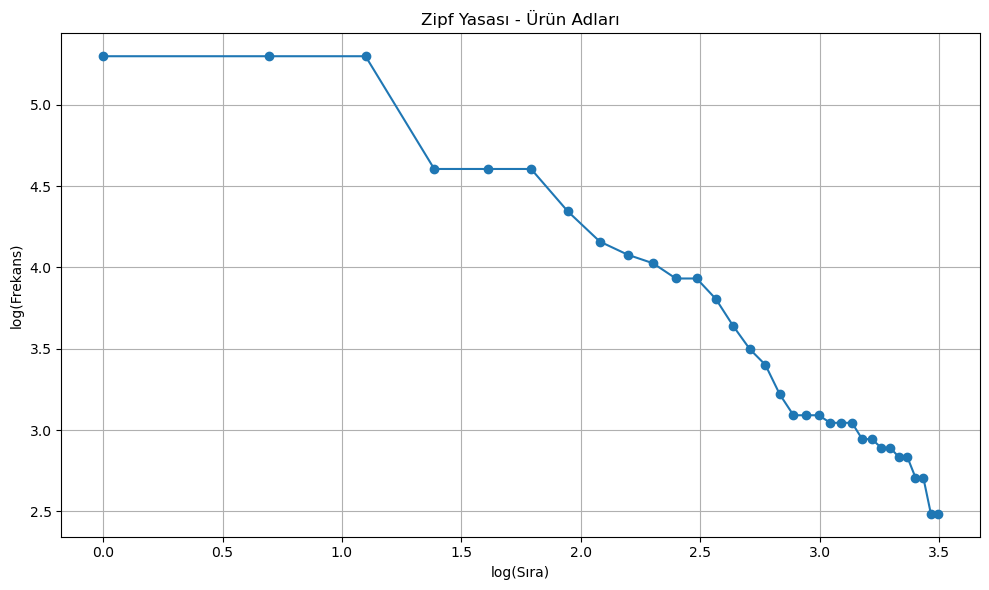

In [209]:
plt.figure(figsize=(10, 6))
plt.plot(np.log(ranks), np.log(sorted_freqs), marker='o', linestyle='-')
plt.title("Zipf Yasasƒ± - √úr√ºn Adlarƒ±")
plt.xlabel("log(Sƒ±ra)")
plt.ylabel("log(Frekans)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [210]:
urun_adlari = df['√úr√ºn Adƒ±'].dropna().astype(str)

In [211]:
vectorizer = TfidfVectorizer(lowercase=True)

In [212]:
tfidf_matrix = vectorizer.fit_transform(urun_adlari)
kelimeler = vectorizer.get_feature_names_out()
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=kelimeler)
print(tfidf_df.head())

   abiye       bel  bluz       bol  boƒüazlƒ±  dantel  dekolteli  detaylƒ±  \
0    0.0  0.367283   0.0  0.000000      0.0     0.0        0.0      0.0   
1    0.0  0.367283   0.0  0.000000      0.0     0.0        0.0      0.0   
2    0.0  0.367283   0.0  0.000000      0.0     0.0        0.0      0.0   
3    0.0  0.358953   0.0  0.598639      0.0     0.0        0.0      0.0   
4    0.0  0.355305   0.0  0.000000      0.0     0.0        0.0      0.0   

        d√ºz  elbise  ...  pantolon      pa√ßa  saten  straplez  sƒ±rt  uzun  \
0  0.572924     0.0  ...  0.367283  0.367283    0.0       0.0   0.0   0.0   
1  0.572924     0.0  ...  0.367283  0.367283    0.0       0.0   0.0   0.0   
2  0.572924     0.0  ...  0.367283  0.367283    0.0       0.0   0.0   0.0   
3  0.000000     0.0  ...  0.358953  0.358953    0.0       0.0   0.0   0.0   
4  0.000000     0.0  ...  0.355305  0.355305    0.0       0.0   0.0   0.0   

   volanlƒ±  yaka    y√ºksek  ≈üifon  
0      0.0   0.0  0.516786    0.0  
1    

In [213]:
print("\nVeri hazƒ±rlƒ±ƒüƒ± yapƒ±lƒ±yor...")
df['description'] = df['√úr√ºn Adƒ±'].astype(str) + ' ' + df['Renk'].astype(str) + ' ' + df['Stil √ñnerisi'].astype(str)


Veri hazƒ±rlƒ±ƒüƒ± yapƒ±lƒ±yor...


In [214]:
turkish_stop_words = set([
    'acaba', 'ama', 'aslƒ±nda', 'az', 'bazƒ±', 'belki', 'biri', 'birka√ß', 
    'bir≈üey', 'biz', 'bu', '√ßok', '√ß√ºnk√º', 'da', 'daha', 'de', 'defa', 
    'diye', 'eƒüer', 'en', 'gibi', 'hem', 'hep', 'hepsi', 'her', 'hi√ß', 
    'i√ßin', 'ile', 'ise', 'kez', 'ki', 'kim', 'mƒ±', 'mu', 'm√º', 'nasƒ±l', 
    'ne', 'neden', 'nerde', 'nerede', 'nereye', 'ni√ßin', 'niye', 'o', 
    'sanki', '≈üey', 'siz', '≈üu', 't√ºm', 've', 'veya', 'ya', 'yani'
])

In [215]:
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords
turkish_stop_words = set(stopwords.words('turkish'))
def preprocess_text(text, process_type='lemmatize'):
    try:
        text = str(text).lower()
        text = re.sub(r'[^\w\s]', '', text)
        tokens = word_tokenize(text)
        tokens = [token for token in tokens if token not in turkish_stop_words]
        tokens = [token for token in tokens if not token.isdigit()]
        tokens = [token for token in tokens if len(token) > 1]
        if process_type == 'lemmatize':
            lemmatizer = WordNetLemmatizer()
            tokens = [lemmatizer.lemmatize(token) for token in tokens]
        elif process_type == 'stem':
            stemmer = PorterStemmer()
            tokens = [stemmer.stem(token) for token in tokens]
        else:
            print("Ge√ßersiz i≈ülem t√ºr√º, 'lemmatize' veya 'stem' se√ßiniz.")
        return tokens
    except Exception as e:
        print("√ñn i≈üleme hatasƒ±:", e)
        return []

In [216]:
print("\nMetin √∂n i≈üleme uygulanƒ±yor...")
df['lemmatized'] = df['description'].apply(lambda x: preprocess_text(x, 'lemmatize'))
df['stemmed'] = df['description'].apply(lambda x: preprocess_text(x, 'stem'))
print("\n√ñn i≈üleme sonrasƒ± √∂rnek √ßƒ±ktƒ±:")
print(df[['description', 'lemmatized', 'stemmed']].head())


Metin √∂n i≈üleme uygulanƒ±yor...

√ñn i≈üleme sonrasƒ± √∂rnek √ßƒ±ktƒ±:
                                         description  \
0  Y√ºksek Bel D√ºz Pa√ßa Pantolon Krem Sneaker ve t...   
1  Y√ºksek Bel D√ºz Pa√ßa Pantolon Kahverengi G√∂mlek...   
2  Orta Bel D√ºz Pa√ßa Pantolon Lacivert Triko kaza...   
3  Y√ºksek Bel Bol Pa√ßa Pantolon Bej G√∂mlek ve top...   
4  Orta Bel Geni≈ü Pa√ßa Pantolon Lacivert Triko ka...   

                                          lemmatized  \
0  [y√ºksek, bel, d√ºz, pa√ßa, pantolon, krem, sneak...   
1  [y√ºksek, bel, d√ºz, pa√ßa, pantolon, kahverengi,...   
2  [orta, bel, d√ºz, pa√ßa, pantolon, lacivert, tri...   
3  [y√ºksek, bel, bol, pa√ßa, pantolon, bej, g√∂mlek...   
4  [orta, bel, geni≈ü, pa√ßa, pantolon, lacivert, t...   

                                             stemmed  
0  [y√ºksek, bel, d√ºz, pa√ßa, pantolon, krem, sneak...  
1  [y√ºksek, bel, d√ºz, pa√ßa, pantolon, kahverengi,...  
2  [orta, bel, d√ºz, pa√ßa, pantolon, lacivert, tri...

In [217]:
def plot_zipf(data, title):
    try:
        all_words = [word for sublist in data for word in sublist]
        word_counts = Counter(all_words)
        sorted_counts = sorted(word_counts.values(), reverse=True)
        ranks = np.arange(1, len(sorted_counts)+1)
        
        plt.figure(figsize=(10,6))
        plt.loglog(ranks, sorted_counts, marker=".")
        plt.title(f"Zipf Yasasƒ± - {title}")
        plt.xlabel("Kelime Sƒ±rasƒ± (log)")
        plt.ylabel("Frekans (log)")
        plt.grid(True)
        plt.show()
        print(f"{title} Zipf grafiƒüi olu≈üturuldu.")
    except Exception as e:
        print(f"Zipf grafiƒüi olu≈üturulamadƒ±: {e}")


Zipf analizi yapƒ±lƒ±yor...


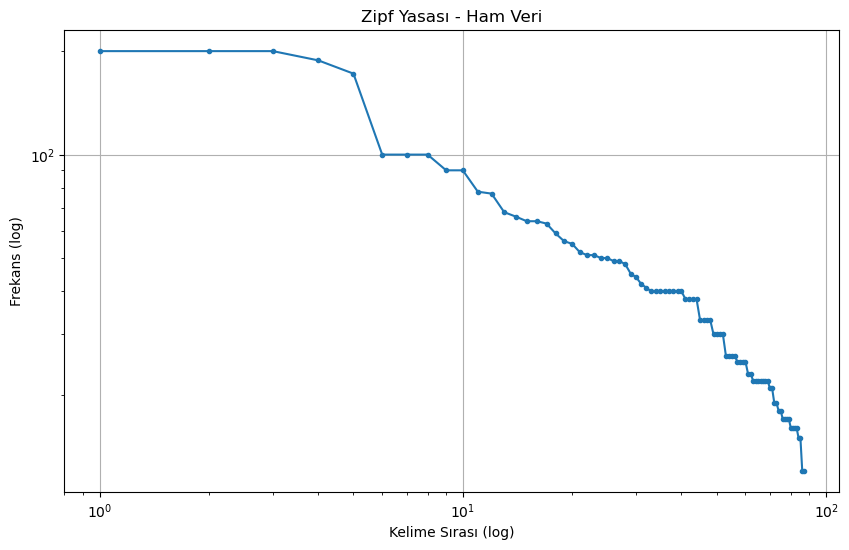

Ham Veri Zipf grafiƒüi olu≈üturuldu.


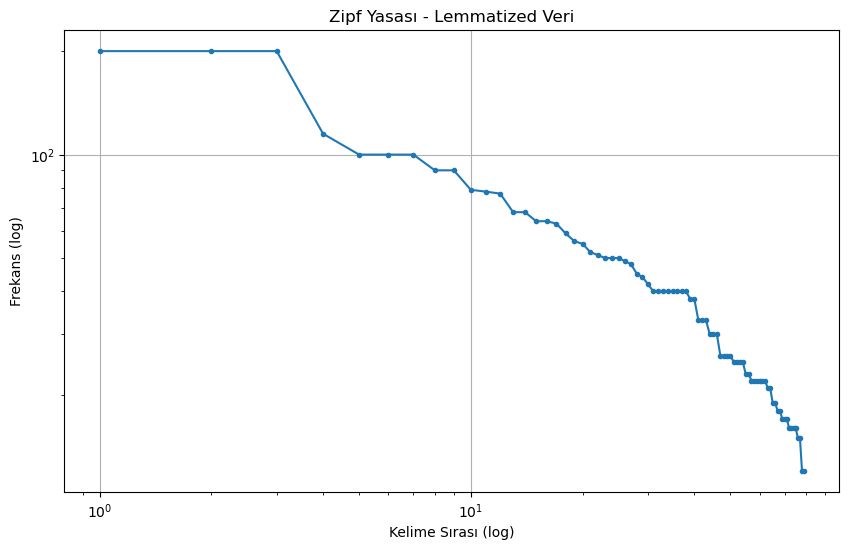

Lemmatized Veri Zipf grafiƒüi olu≈üturuldu.


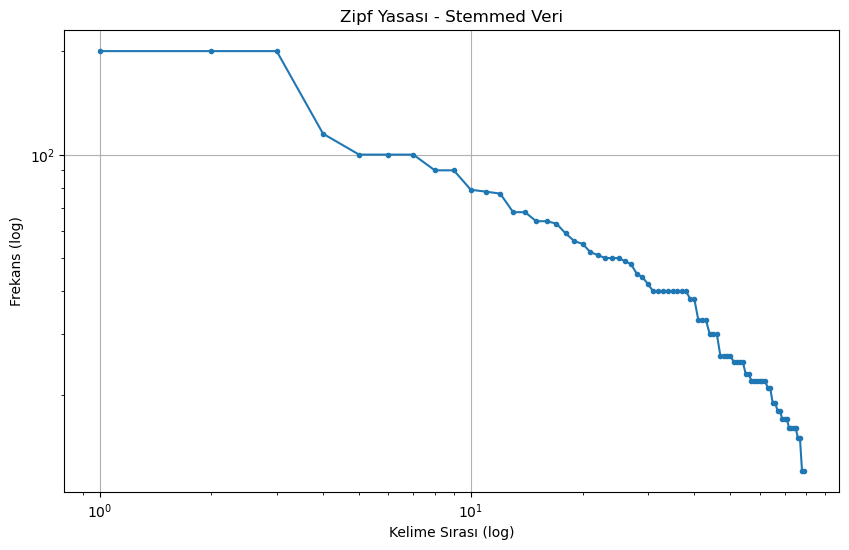

Stemmed Veri Zipf grafiƒüi olu≈üturuldu.


In [218]:
print("\nZipf analizi yapƒ±lƒ±yor...")
plot_zipf(df['description'].apply(lambda x: x.split()), "Ham Veri")
plot_zipf(df['lemmatized'], "Lemmatized Veri")
plot_zipf(df['stemmed'], "Stemmed Veri")

In [219]:
print("\nTF-IDF vekt√∂rle≈ütirme yapƒ±lƒ±yor...")
def create_tfidf(data, name):
    try:
        corpus = [" ".join(tokens) for tokens in data]
        vectorizer = TfidfVectorizer()
        X = vectorizer.fit_transform(corpus)
        df_tfidf = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
        df_tfidf.to_csv(f"tfidf_{name}.csv", index=False)
        print(f"tfidf_{name}.csv ba≈üarƒ±yla kaydedildi. Boyut:", df_tfidf.shape)
        return df_tfidf
    except Exception as e:
        print(f"TF-IDF olu≈üturulamadƒ± ({name}):", e)
        return None
tfidf_lemmatized = create_tfidf(df['lemmatized'], "lemmatized")
tfidf_stemmed = create_tfidf(df['stemmed'], "stemmed")


TF-IDF vekt√∂rle≈ütirme yapƒ±lƒ±yor...
tfidf_lemmatized.csv ba≈üarƒ±yla kaydedildi. Boyut: (400, 79)
tfidf_stemmed.csv ba≈üarƒ±yla kaydedildi. Boyut: (400, 79)


In [220]:
from gensim.models import Word2Vec

print("\nWord2Vec modelleri eƒüitiliyor...")

def train_word2vec(sentences, name, model_type='cbow', window=5, vector_size=100):
    try:
        model = Word2Vec(
            sentences=sentences,
            sg=1 if model_type == 'skipgram' else 0,
            window=window,
            vector_size=vector_size,
            min_count=1,
            workers=4
        )
        model.save(f"word2vec_{name}_{model_type}_w{window}_d{vector_size}.model")
        print(f"Model {name}_{model_type} kaydedildi.")
    except Exception as e:
        print(f"Model eƒüitilirken hata olu≈ütu: {e}")


Word2Vec modelleri eƒüitiliyor...


In [221]:
def train_word2vec(sentences, name, model_type='cbow', window=5, vector_size=100):
    try:
        model = Word2Vec(
            sentences=sentences,
            sg=1 if model_type == 'skipgram' else 0,
            window=window,
            vector_size=vector_size,
            min_count=1,
            workers=4
        )
        try:
            similar = model.wv.most_similar('elbise', topn=5)
            print(f"'elbise' i√ßin benzer kelimeler: {similar}")
        except:
            print("'elbise' kelimesi modelde bulunamadƒ±")
        model.save(f"word2vec_{name}_{model_type}_w{window}_d{vector_size}.model")
        print(f"Model {name}_{model_type} kaydedildi.")

        return model
    except Exception as e:
        print(f"Word2Vec modeli eƒüitilemedi ({name}):", e)
        return None

In [222]:
params = [
    {'model_type': 'cbow', 'window': 2, 'vector_size': 100},
    {'model_type': 'skipgram', 'window': 2, 'vector_size': 100},
    {'model_type': 'cbow', 'window': 5, 'vector_size': 100},
    {'model_type': 'skipgram', 'window': 5, 'vector_size': 100},
    {'model_type': 'cbow', 'window': 2, 'vector_size': 300},
    {'model_type': 'skipgram', 'window': 2, 'vector_size': 300},
    {'model_type': 'cbow', 'window': 5, 'vector_size': 300},
    {'model_type': 'skipgram', 'window': 5, 'vector_size': 300}
]

In [223]:
for param in params:
    print(f"\n{param['model_type']} modeli eƒüitiliyor (window={param['window']}, dim={param['vector_size']})...")
    train_word2vec(
        sentences=df['lemmatized'],
        name='lemmatized',
        model_type=param['model_type'],
        window=param['window'],
        vector_size=param['vector_size']
    )


cbow modeli eƒüitiliyor (window=2, dim=100)...
'elbise' i√ßin benzer kelimeler: [('kuma≈ü', 0.9366440773010254), ('gece', 0.9214726090431213), ('bluz', 0.9194682836532593), ('elbisesi', 0.9172019958496094), ('bir', 0.9132724404335022)]
Model lemmatized_cbow kaydedildi.

skipgram modeli eƒüitiliyor (window=2, dim=100)...
'elbise' i√ßin benzer kelimeler: [('kuma≈ü', 0.9935644865036011), ('bluz', 0.9924165606498718), ('gece', 0.9920743703842163), ('elbisesi', 0.9917086958885193), ('bir', 0.9915503263473511)]
Model lemmatized_skipgram kaydedildi.

cbow modeli eƒüitiliyor (window=5, dim=100)...
'elbise' i√ßin benzer kelimeler: [('kuma≈ü', 0.9801357388496399), ('pa√ßa', 0.9758625030517578), ('bluz', 0.9746795296669006), ('mezuniyet', 0.9739992618560791), ('bir', 0.9727997779846191)]
Model lemmatized_cbow kaydedildi.

skipgram modeli eƒüitiliyor (window=5, dim=100)...
'elbise' i√ßin benzer kelimeler: [('kuma≈ü', 0.9981023669242859), ('gece', 0.9978724122047424), ('ye≈üil', 0.997841477394104)

In [224]:
 train_word2vec(
        sentences=df['stemmed'],
        name='stemmed',
        model_type=param['model_type'],
        window=param['window'],
        vector_size=param['vector_size']
    )
print("\nT√ºm i≈ülemler ba≈üarƒ±yla tamamlandƒ±!")

'elbise' kelimesi modelde bulunamadƒ±
Model stemmed_skipgram kaydedildi.

T√ºm i≈ülemler ba≈üarƒ±yla tamamlandƒ±!


In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import gensim
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from sklearn.metrics import jaccard_score
from sklearn.preprocessing import MultiLabelBinarizer
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

In [226]:
import pandas as pd
import os
lemmatized_path = "C:/Users/G√ºlnur/Desktop/kadin_giyim_urunleri.csv"
stemmed_path = "C:/Users/G√ºlnur/Desktop/kadin_giyim_urunleri.csv"
def load_csv_safe(path):
    try:
        if not os.path.exists(path):
            print(f"HATA ‚ùå: Dosya bulunamadƒ±: {path}")
            return None
        try:
            df = pd.read_csv(path, encoding="utf-8")
        except UnicodeDecodeError:
            df = pd.read_csv(path, encoding="utf-8-sig")
        print(f"‚úÖ '{path}' ba≈üarƒ±yla y√ºklendi. S√ºtunlar:")
        print(df.columns.tolist())
        print("\nƒ∞lk 5 satƒ±r:")
        print(df.head(), "\n")
        return df
    except Exception as e:
        print(f"‚ö†Ô∏è '{path}' dosyasƒ±nƒ± y√ºklerken bir hata olu≈ütu: {e}")
        return None
df_lemmatized = load_csv_safe(lemmatized_path)
df_stemmed = load_csv_safe(stemmed_path)

‚úÖ 'C:/Users/G√ºlnur/Desktop/kadin_giyim_urunleri.csv' ba≈üarƒ±yla y√ºklendi. S√ºtunlar:
['Kategori', '√úr√ºn Adƒ±', 'Renk', 'Bel Tipi', 'Pa√ßa Tipi', 'Kuma≈ü', 'Detay', 'Kapatma', 'Cep Bilgisi', 'Stil √ñnerisi', 'Kalƒ±p']

ƒ∞lk 5 satƒ±r:
   Kategori                      √úr√ºn Adƒ±        Renk    Bel Tipi Pa√ßa Tipi  \
0  Pantolon  Y√ºksek Bel D√ºz Pa√ßa Pantolon        Krem    Orta Bel  Bol Pa√ßa   
1  Pantolon  Y√ºksek Bel D√ºz Pa√ßa Pantolon  Kahverengi  Y√ºksek Bel  D√ºz Pa√ßa   
2  Pantolon    Orta Bel D√ºz Pa√ßa Pantolon    Lacivert  Y√ºksek Bel  Bol Pa√ßa   
3  Pantolon  Y√ºksek Bel Bol Pa√ßa Pantolon         Bej  Y√ºksek Bel  D√ºz Pa√ßa   
4  Pantolon  Orta Bel Geni≈ü Pa√ßa Pantolon    Lacivert    Orta Bel  Bol Pa√ßa   

       Kuma≈ü          Detay      Kapatma       Cep Bilgisi  \
0     Viskon  Diki≈ü Detaylƒ±  Yan Fermuar  Arka Cep Detaylƒ±   
1     Dokuma         Biyeli  Yan Fermuar  Arka Cep Detaylƒ±   
2     Viskon  Diki≈ü Detaylƒ±  Yan Fermuar       ƒ∞ki Yan Cep   
3  

In [227]:
def get_first_text_column(df):
    for col in df.columns:
        if df[col].dtype == "object":  
            return col
    raise ValueError("Uygun bir metin s√ºtunu bulunamadƒ±.")
lem_col = get_first_text_column(df_lemmatized)
stem_col = get_first_text_column(df_stemmed)
input_text_lem = df_lemmatized[lem_col].iloc[0]
input_text_stem = df_stemmed[stem_col].iloc[0]
print("Se√ßilen giri≈ü metni (lemmatized):", input_text_lem)
print("Se√ßilen giri≈ü metni (stemmed):", input_text_stem)

Se√ßilen giri≈ü metni (lemmatized): Pantolon
Se√ßilen giri≈ü metni (stemmed): Pantolon


In [236]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
column_name = '√úr√ºn Adƒ±'  
if column_name not in df_lemmatized.columns or column_name not in df_stemmed.columns:
    raise ValueError(f"'{column_name}' adlƒ± s√ºtun df_lemmatized veya df_stemmed i√ßinde bulunamadƒ±.")
tfidf_vectorizer_lem = TfidfVectorizer()
tfidf_matrix_lem = tfidf_vectorizer_lem.fit_transform(df_lemmatized[column_name])
tfidf_vectorizer_stem = TfidfVectorizer()
tfidf_matrix_stem = tfidf_vectorizer_stem.fit_transform(df_stemmed[column_name])
input_vec_lem = tfidf_vectorizer_lem.transform([input_text_lem])
input_vec_stem = tfidf_vectorizer_stem.transform([input_text_stem])
similarities_lem = cosine_similarity(input_vec_lem, tfidf_matrix_lem).flatten()
similarities_stem = cosine_similarity(input_vec_stem, tfidf_matrix_stem).flatten()
top5_lem_idx = similarities_lem.argsort()[-6:-1][::-1]
top5_stem_idx = similarities_stem.argsort()[-6:-1][::-1]
print("Top 5 TF-IDF Lemmatized Results:")
for i in top5_lem_idx:
    print(f"Score: {similarities_lem[i]:.4f} - {df_lemmatized[column_name].iloc[i]}")
print("\nTop 5 TF-IDF Stemmed Results:")
for i in top5_stem_idx:
    print(f"Score: {similarities_stem[i]:.4f} - {df_stemmed[column_name].iloc[i]}")

Top 5 TF-IDF Lemmatized Results:
Score: 0.3673 - Orta Bel D√ºz Pa√ßa Pantolon
Score: 0.3673 - Y√ºksek Bel D√ºz Pa√ßa Pantolon
Score: 0.3673 - Y√ºksek Bel D√ºz Pa√ßa Pantolon
Score: 0.3673 - Orta Bel D√ºz Pa√ßa Pantolon
Score: 0.3673 - Orta Bel D√ºz Pa√ßa Pantolon

Top 5 TF-IDF Stemmed Results:
Score: 0.3673 - Orta Bel D√ºz Pa√ßa Pantolon
Score: 0.3673 - Y√ºksek Bel D√ºz Pa√ßa Pantolon
Score: 0.3673 - Y√ºksek Bel D√ºz Pa√ßa Pantolon
Score: 0.3673 - Orta Bel D√ºz Pa√ßa Pantolon
Score: 0.3673 - Orta Bel D√ºz Pa√ßa Pantolon


In [229]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
df_lemmatized = pd.read_csv("C:/Users/G√ºlnur/Desktop/kadin_giyim_urunleri.csv")
df_stemmed = pd.read_csv("C:/Users/G√ºlnur/Desktop/kadin_giyim_urunleri.csv")
def get_first_text_column(df):
    for col in df.columns:
        if df[col].dtype == "object":
            return col
    raise ValueError("Uygun metin s√ºtunu bulunamadƒ±.")
lem_col = get_first_text_column(df_lemmatized)
stem_col = get_first_text_column(df_stemmed)
input_text_lem = df_lemmatized[lem_col].iloc[0]
input_text_stem = df_stemmed[stem_col].iloc[0]
tfidf_vectorizer_lem = TfidfVectorizer()
tfidf_matrix_lem = tfidf_vectorizer_lem.fit_transform(df_lemmatized[lem_col])
tfidf_vectorizer_stem = TfidfVectorizer()
tfidf_matrix_stem = tfidf_vectorizer_stem.fit_transform(df_stemmed[stem_col])
input_vec_lem = tfidf_vectorizer_lem.transform([input_text_lem])
input_vec_stem = tfidf_vectorizer_stem.transform([input_text_stem])
similarities_lem = cosine_similarity(input_vec_lem, tfidf_matrix_lem).flatten()
similarities_stem = cosine_similarity(input_vec_stem, tfidf_matrix_stem).flatten()
top5_lem_idx = similarities_lem.argsort()[-6:-1][::-1]
top5_stem_idx = similarities_stem.argsort()[-6:-1][::-1]
print("Top 5 TF-IDF Lemmatized Results:")
for i in top5_lem_idx:
    print(f"Score: {similarities_lem[i]:.4f} - {df_lemmatized[lem_col].iloc[i]}")
print("\nTop 5 TF-IDF Stemmed Results:")
for i in top5_stem_idx:
    print(f"Score: {similarities_stem[i]:.4f} - {df_stemmed[stem_col].iloc[i]}")

Top 5 TF-IDF Lemmatized Results:
Score: 1.0000 - Pantolon
Score: 1.0000 - Pantolon
Score: 1.0000 - Pantolon
Score: 1.0000 - Pantolon
Score: 1.0000 - Pantolon

Top 5 TF-IDF Stemmed Results:
Score: 1.0000 - Pantolon
Score: 1.0000 - Pantolon
Score: 1.0000 - Pantolon
Score: 1.0000 - Pantolon
Score: 1.0000 - Pantolon


In [230]:
import os
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
file_lem = "C:/Users/G√ºlnur/Desktop/kadin_giyim_urunleri.csv"
file_stem = "C:/Users/G√ºlnur/Desktop/kadin_giyim_urunleri.csv"
if not os.path.exists(file_lem):
    raise FileNotFoundError(f"HATA: '{file_lem}' dosyasƒ± mevcut deƒüil. L√ºtfen doƒüru dizinde olduƒüundan emin olun.")
if not os.path.exists(file_stem):
    raise FileNotFoundError(f"HATA: '{file_stem}' dosyasƒ± mevcut deƒüil. L√ºtfen doƒüru dizinde olduƒüundan emin olun.")
df_lemmatized = pd.read_csv(file_lem)
df_stemmed = pd.read_csv(file_stem)
def get_first_text_column(df):
    for col in df.columns:
        if df[col].dtype == "object":
            return col
    raise ValueError("Uygun metin s√ºtunu bulunamadƒ±.")
lem_col = get_first_text_column(df_lemmatized)
stem_col = get_first_text_column(df_stemmed)
input_text_lem = df_lemmatized[lem_col].iloc[0]
input_text_stem = df_stemmed[stem_col].iloc[0]
tfidf_vectorizer_lem = TfidfVectorizer()
tfidf_matrix_lem = tfidf_vectorizer_lem.fit_transform(df_lemmatized[lem_col])
tfidf_vectorizer_stem = TfidfVectorizer()
tfidf_matrix_stem = tfidf_vectorizer_stem.fit_transform(df_stemmed[stem_col])
input_vec_lem = tfidf_vectorizer_lem.transform([input_text_lem])
input_vec_stem = tfidf_vectorizer_stem.transform([input_text_stem])
similarities_lem = cosine_similarity(input_vec_lem, tfidf_matrix_lem).flatten()
similarities_stem = cosine_similarity(input_vec_stem, tfidf_matrix_stem).flatten()
top5_lem_idx = similarities_lem.argsort()[-6:-1][::-1]
top5_stem_idx = similarities_stem.argsort()[-6:-1][::-1]
print("Top 5 TF-IDF Lemmatized Results:")
for i in top5_lem_idx:
    print(f"Score: {similarities_lem[i]:.4f} - {df_lemmatized[lem_col].iloc[i]}")
print("\nTop 5 TF-IDF Stemmed Results:")
for i in top5_stem_idx:
    print(f"Score: {similarities_stem[i]:.4f} - {df_stemmed[stem_col].iloc[i]}")

Top 5 TF-IDF Lemmatized Results:
Score: 1.0000 - Pantolon
Score: 1.0000 - Pantolon
Score: 1.0000 - Pantolon
Score: 1.0000 - Pantolon
Score: 1.0000 - Pantolon

Top 5 TF-IDF Stemmed Results:
Score: 1.0000 - Pantolon
Score: 1.0000 - Pantolon
Score: 1.0000 - Pantolon
Score: 1.0000 - Pantolon
Score: 1.0000 - Pantolon


In [231]:
import os
import glob
import numpy as np
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
word2vec_models = {}
model_files = glob.glob("*.model")   
for path in model_files:
    model_name = os.path.splitext(os.path.basename(path))[0]
    word2vec_models[model_name] = Word2Vec.load(path)
def average_vector(model, sentence):
    vectors = []
    for word in sentence.split():
        if word in model.wv:
            vectors.append(model.wv[word])
    if len(vectors) == 0:
        return np.zeros(model.vector_size)
    return np.mean(vectors, axis=0)
def get_first_text_column(df):
    for col in df.columns:
        if df[col].dtype == "object":
            return col
    raise ValueError("Uygun metin s√ºtunu bulunamadƒ±.")
lem_col = get_first_text_column(df_lemmatized)
results = {}
for name, model in word2vec_models.items():
    input_vec = average_vector(model, input_text_lem)
    doc_vecs = df_lemmatized[lem_col].apply(lambda x: average_vector(model, x))
    similarities = [cosine_similarity([input_vec], [vec])[0][0] for vec in doc_vecs]
    top5_idx = np.argsort(similarities)[-6:-1][::-1]
    results[name] = [df_lemmatized[lem_col].iloc[i] for i in top5_idx]
    print(f"\nTop 5 results for model: {name}")
    for i in top5_idx:
        print(f"Score: {similarities[i]:.4f} - {df_lemmatized[lem_col].iloc[i]}")


Top 5 results for model: word2vec_lemmatized_cbow_w2_d100
Score: 0.0000 - Pantolon
Score: 0.0000 - Pantolon
Score: 0.0000 - Pantolon
Score: 0.0000 - Pantolon
Score: 0.0000 - Pantolon

Top 5 results for model: word2vec_lemmatized_cbow_w2_d300
Score: 0.0000 - Pantolon
Score: 0.0000 - Pantolon
Score: 0.0000 - Pantolon
Score: 0.0000 - Pantolon
Score: 0.0000 - Pantolon

Top 5 results for model: word2vec_lemmatized_cbow_w5_d100
Score: 0.0000 - Pantolon
Score: 0.0000 - Pantolon
Score: 0.0000 - Pantolon
Score: 0.0000 - Pantolon
Score: 0.0000 - Pantolon

Top 5 results for model: word2vec_lemmatized_cbow_w5_d300
Score: 0.0000 - Pantolon
Score: 0.0000 - Pantolon
Score: 0.0000 - Pantolon
Score: 0.0000 - Pantolon
Score: 0.0000 - Pantolon

Top 5 results for model: word2vec_lemmatized_skipgram_w2_d100
Score: 0.0000 - Pantolon
Score: 0.0000 - Pantolon
Score: 0.0000 - Pantolon
Score: 0.0000 - Pantolon
Score: 0.0000 - Pantolon

Top 5 results for model: word2vec_lemmatized_skipgram_w2_d300
Score: 0.0000

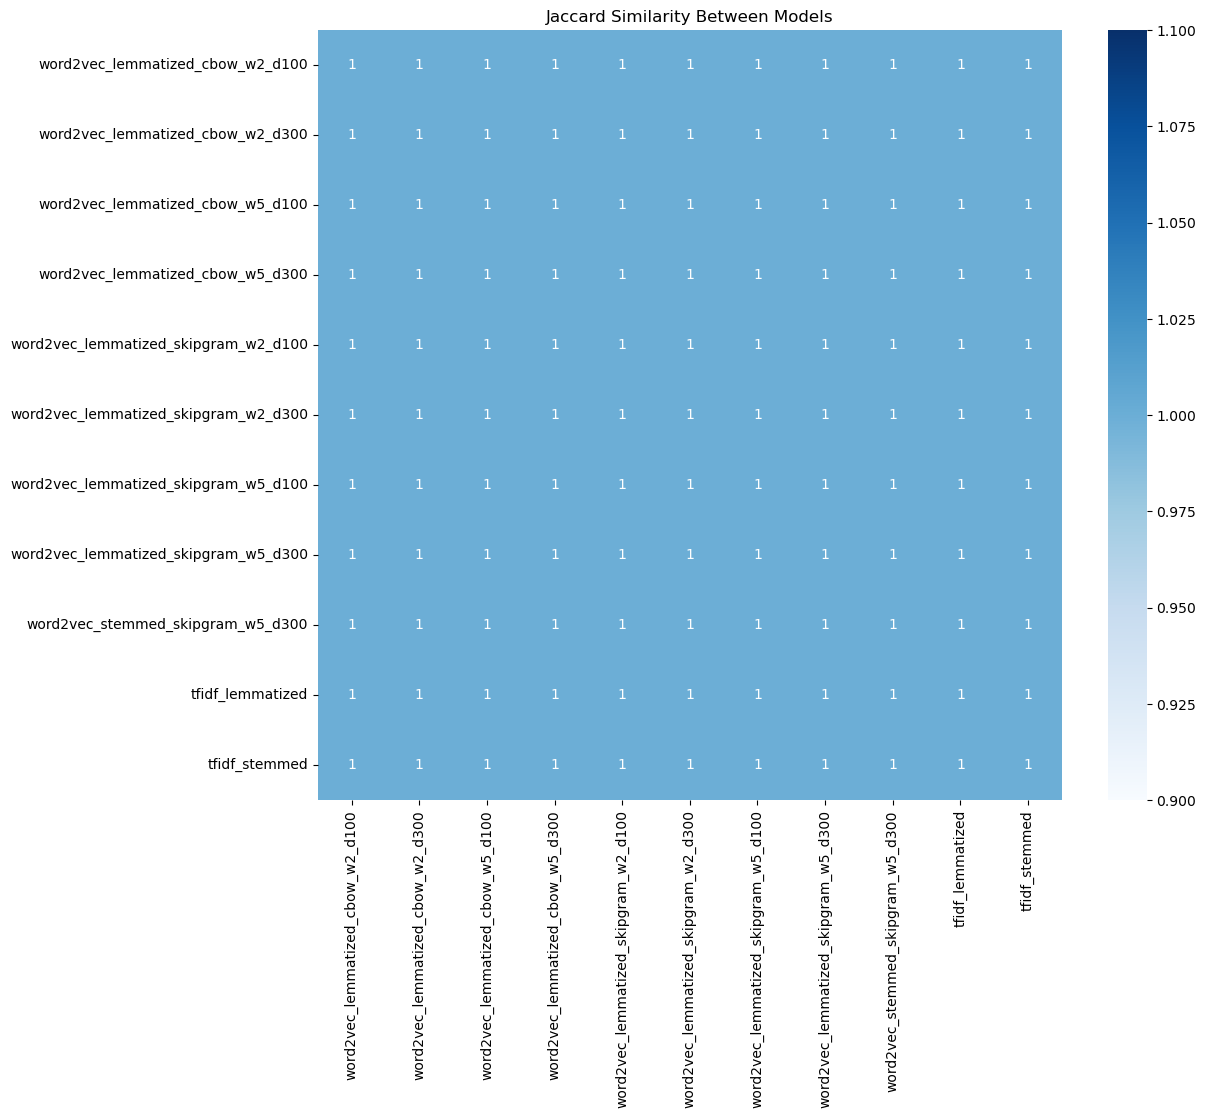

In [232]:
def get_first_text_column(df):
    for col in df.columns:
        if df[col].dtype == "object":
            return col
    raise ValueError("Uygun metin s√ºtunu bulunamadƒ±.")
lem_col = get_first_text_column(df_lemmatized)
stem_col = get_first_text_column(df_stemmed)
all_model_names = list(results.keys()) + ["tfidf_lemmatized", "tfidf_stemmed"]
all_top5 = {name: set(results[name]) for name in results}
all_top5["tfidf_lemmatized"] = set(df_lemmatized[lem_col].iloc[top5_lem_idx])
all_top5["tfidf_stemmed"] = set(df_stemmed[stem_col].iloc[top5_stem_idx])
jaccard_matrix = pd.DataFrame(index=all_model_names, columns=all_model_names)
for model1 in all_model_names:
    for model2 in all_model_names:
        set1 = all_top5[model1]
        set2 = all_top5[model2]
        intersection = len(set1.intersection(set2))
        union = len(set1.union(set2))
        jaccard_matrix.loc[model1, model2] = round(intersection / union, 2)
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 10))
sns.heatmap(jaccard_matrix.astype(float), annot=True, cmap="Blues")
plt.title("Jaccard Similarity Between Models")
plt.show()

In [241]:
from sklearn.feature_extraction.text import TfidfVectorizer
column_name = '√úr√ºn Adƒ±'
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df_lemmatized[column_name])
print("üîπ TF-IDF temsili ba≈üarƒ±yla olu≈üturuldu.")
print("TF-IDF matris boyutu:", tfidf_matrix.shape)

üîπ TF-IDF temsili ba≈üarƒ±yla olu≈üturuldu.
TF-IDF matris boyutu: (400, 32)


In [242]:
from sklearn.metrics.pairwise import cosine_similarity
input_text_lem = "cepli dar pa√ßa pantolon"  
input_vec = tfidf_vectorizer.transform([input_text_lem])
similarities = cosine_similarity(input_vec, tfidf_matrix).flatten()
top5_idx = similarities.argsort()[-6:-1][::-1]
print("üîπ TF-IDF ile en benzer 5 √ºr√ºn:")
for i in top5_idx:
    print(f"Skor: {similarities[i]:.4f} - {df_lemmatized[column_name].iloc[i]}")

üîπ TF-IDF ile en benzer 5 √ºr√ºn:
Skor: 0.5194 - Orta Bel D√ºz Pa√ßa Pantolon
Skor: 0.5194 - Y√ºksek Bel D√ºz Pa√ßa Pantolon
Skor: 0.5194 - Y√ºksek Bel D√ºz Pa√ßa Pantolon
Skor: 0.5194 - Orta Bel D√ºz Pa√ßa Pantolon
Skor: 0.5194 - Orta Bel D√ºz Pa√ßa Pantolon


In [243]:
from gensim.models import Word2Vec
import numpy as np
tokenized = [text.split() for text in df_lemmatized[column_name]]
w2v_model = Word2Vec(sentences=tokenized, vector_size=100, window=5, min_count=1, workers=4)
def get_average_vector(tokens, model):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)
w2v_vectors = np.array([get_average_vector(text.split(), w2v_model) for text in df_lemmatized[column_name]])
input_vec_w2v = get_average_vector(input_text_lem.split(), w2v_model)
w2v_similarities = cosine_similarity([input_vec_w2v], w2v_vectors).flatten()
top5_w2v_idx = w2v_similarities.argsort()[-6:-1][::-1]
print("üîπ Word2Vec ile en benzer 5 √ºr√ºn:")
for i in top5_w2v_idx:
    print(f"Skor: {w2v_similarities[i]:.4f} - {df_lemmatized[column_name].iloc[i]}")

üîπ Word2Vec ile en benzer 5 √ºr√ºn:
Skor: 0.0000 - Y√ºksek Bel D√ºz Pa√ßa Pantolon
Skor: 0.0000 - Y√ºksek Bel D√ºz Pa√ßa Pantolon
Skor: 0.0000 - Y√ºksek Bel Bol Pa√ßa Pantolon
Skor: 0.0000 - Y√ºksek Bel Geni≈ü Pa√ßa Pantolon
Skor: 0.0000 - Orta Bel Bol Pa√ßa Pantolon


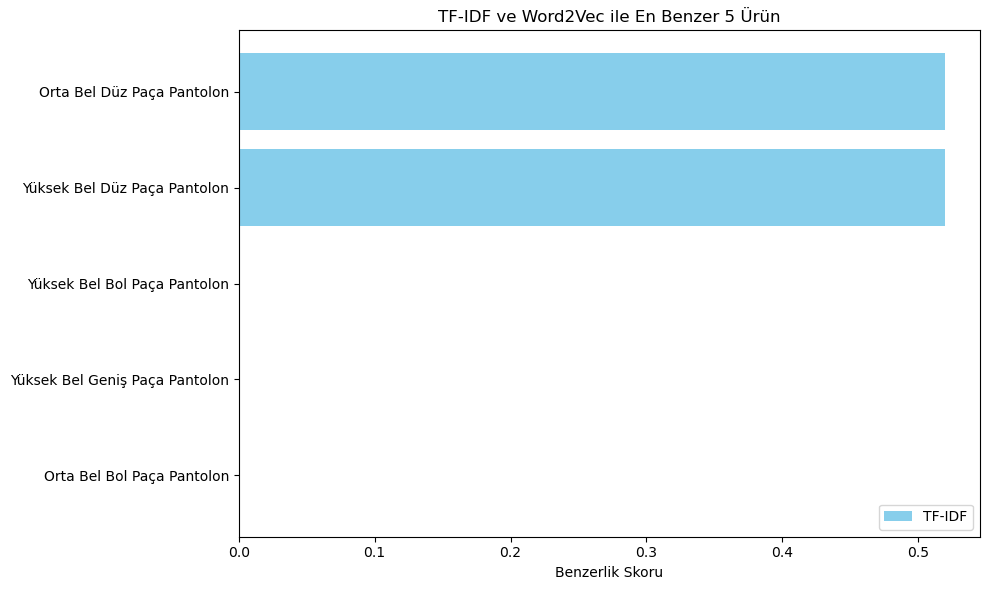

In [244]:
import matplotlib.pyplot as plt
labels = ['TF-IDF'] * 5 + ['Word2Vec'] * 5
scores = list(similarities[top5_idx]) + list(w2v_similarities[top5_w2v_idx])
products = [df_lemmatized[column_name].iloc[i] for i in top5_idx] + [df_lemmatized[column_name].iloc[i] for i in top5_w2v_idx]
plt.figure(figsize=(10, 6))
bars = plt.barh(products, scores, color=['skyblue']*5 + ['lightgreen']*5)
plt.xlabel("Benzerlik Skoru")
plt.title("TF-IDF ve Word2Vec ile En Benzer 5 √úr√ºn")
plt.legend(["TF-IDF", "Word2Vec"], loc='lower right')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [245]:
df = pd.read_csv("C:/Users/G√ºlnur/Desktop/kadin_giyim_urunleri.csv", encoding='utf-8')
print("S√ºtunlar:", df.columns.tolist())
df.head()

S√ºtunlar: ['Kategori', '√úr√ºn Adƒ±', 'Renk', 'Bel Tipi', 'Pa√ßa Tipi', 'Kuma≈ü', 'Detay', 'Kapatma', 'Cep Bilgisi', 'Stil √ñnerisi', 'Kalƒ±p']


Kategori                      √úr√ºn Adƒ±        Renk    Bel Tipi Pa√ßa Tipi  \
0  Pantolon  Y√ºksek Bel D√ºz Pa√ßa Pantolon        Krem    Orta Bel  Bol Pa√ßa   
1  Pantolon  Y√ºksek Bel D√ºz Pa√ßa Pantolon  Kahverengi  Y√ºksek Bel  D√ºz Pa√ßa   
2  Pantolon    Orta Bel D√ºz Pa√ßa Pantolon    Lacivert  Y√ºksek Bel  Bol Pa√ßa   
3  Pantolon  Y√ºksek Bel Bol Pa√ßa Pantolon         Bej  Y√ºksek Bel  D√ºz Pa√ßa   
4  Pantolon  Orta Bel Geni≈ü Pa√ßa Pantolon    Lacivert    Orta Bel  Bol Pa√ßa   

       Kuma≈ü          Detay      Kapatma       Cep Bilgisi  \
0     Viskon  Diki≈ü Detaylƒ±  Yan Fermuar  Arka Cep Detaylƒ±   
1     Dokuma         Biyeli  Yan Fermuar  Arka Cep Detaylƒ±   
2     Viskon  Diki≈ü Detaylƒ±  Yan Fermuar       ƒ∞ki Yan Cep   
3  Polyester        Minimal  Yan Fermuar       ƒ∞ki Yan Cep   
4      Keten         Pileli      D√ºƒümeli  Arka Cep Detaylƒ±   

                          Stil √ñnerisi        Kalƒ±p  
0  Sneaker ve ti≈ü√∂rtle g√ºnl√ºk kullanƒ±m    Dar Kalƒ±p  
1    G√∂mlek ve topuklu ile ofise uygun    Dar Kalƒ±p  
2          Triko kazakla kƒ±≈ülƒ±k kombin  Rahat Kalƒ±p  
3    G√∂mlek ve topuklu ile ofise uygun  Rahat Kalƒ±p  
4          Triko kazakla kƒ±≈ülƒ±k kombin  Rahat Kalƒ±p

In [246]:
renk_listesi = [
    'kƒ±rmƒ±zƒ±', 'mavi', 'ye≈üil', 'sarƒ±', 'siyah', 'beyaz', 'gri', 'mor',
    'turuncu', 'pembe', 'bej', 'kahverengi', 'lacivert', 'bordo', 'altƒ±n', 'g√ºm√º≈ü'
]

color_palette = {
    'kƒ±rmƒ±zƒ±': (255, 0, 0),
    'mavi': (0, 0, 255),
    'ye≈üil': (0, 128, 0),
    'sarƒ±': (255, 255, 0),
    'siyah': (0, 0, 0),
    'beyaz': (255, 255, 255),
    'gri': (128, 128, 128),
    'mor': (128, 0, 128),
    'turuncu': (255, 165, 0),
    'pembe': (255, 192, 203),
    'bej': (245, 245, 220),
    'kahverengi': (165, 42, 42),
    'lacivert': (0, 0, 139),
    'bordo': (128, 0, 32),
    'altƒ±n': (255, 215, 0),
    'g√ºm√º≈ü': (192, 192, 192)
}

In [247]:
def tokenize(text):
    return re.findall(r'\b\w+\b', str(text).lower())

In [248]:
def renk_ayikla(tokens):
    return [tok for tok in tokens if tok in renk_listesi]

In [249]:
df['description'] = df['√úr√ºn Adƒ±'].fillna('') + ' ' + df['Renk'].fillna('') + ' ' + df['Stil √ñnerisi'].fillna('')
df['tokens'] = df['description'].apply(tokenize)
df['renkler'] = df['tokens'].apply(renk_ayikla)
df[['description', 'tokens', 'renkler']].head()

description  \
0  Y√ºksek Bel D√ºz Pa√ßa Pantolon Krem Sneaker ve t...   
1  Y√ºksek Bel D√ºz Pa√ßa Pantolon Kahverengi G√∂mlek...   
2  Orta Bel D√ºz Pa√ßa Pantolon Lacivert Triko kaza...   
3  Y√ºksek Bel Bol Pa√ßa Pantolon Bej G√∂mlek ve top...   
4  Orta Bel Geni≈ü Pa√ßa Pantolon Lacivert Triko ka...   

                                              tokens       renkler  
0  [y√ºksek, bel, d√ºz, pa√ßa, pantolon, krem, sneak...            []  
1  [y√ºksek, bel, d√ºz, pa√ßa, pantolon, kahverengi,...  [kahverengi]  
2  [orta, bel, d√ºz, pa√ßa, pantolon, lacivert, tri...    [lacivert]  
3  [y√ºksek, bel, bol, pa√ßa, pantolon, bej, g√∂mlek...         [bej]  
4  [orta, bel, geni≈ü, pa√ßa, pantolon, lacivert, t...    [lacivert]

In [250]:
genis_renk_eslestirme = {
    'a√ßƒ±k mavi': 'mavi',
    'koyu mavi': 'mavi',
    'a√ßƒ±k ye≈üil': 'ye≈üil',
    'koyu ye≈üil': 'ye≈üil',
    'a√ßƒ±k pembe': 'pembe',
    'koyu pembe': 'pembe',
    'lacivert': 'mavi',
    'bej': 'bej',
    'krem': 'beyaz',
    'siyah': 'siyah',
    'beyaz': 'beyaz',
    'gri': 'gri',
    'kahverengi': 'kahverengi',
    'zeytin ye≈üili': 'ye≈üil',
    'bordo': 'kƒ±rmƒ±zƒ±',
    'ekru': 'beyaz',
    'mavi': 'mavi',
    'ye≈üil': 'ye≈üil',
    'kƒ±rmƒ±zƒ±': 'kƒ±rmƒ±zƒ±',
    'turuncu': 'turuncu',
    'mor': 'mor',
    'pembe': 'pembe',
    'sarƒ±': 'sarƒ±'
}
def renk_ayikla_genis_ve_kisa(description):
    description = description.lower()
    matched_colors = []
    for renk_ifadesi, temel_renk in genis_renk_eslestirme.items():
        if renk_ifadesi in description:
            matched_colors.append(temel_renk)
    return list(set(matched_colors))
df['renkler_genis'] = df['description'].apply(renk_ayikla_genis_ve_kisa)
df[['description', 'renkler_genis']].head()


description renkler_genis
0  Y√ºksek Bel D√ºz Pa√ßa Pantolon Krem Sneaker ve t...       [beyaz]
1  Y√ºksek Bel D√ºz Pa√ßa Pantolon Kahverengi G√∂mlek...  [kahverengi]
2  Orta Bel D√ºz Pa√ßa Pantolon Lacivert Triko kaza...        [mavi]
3  Y√ºksek Bel Bol Pa√ßa Pantolon Bej G√∂mlek ve top...         [bej]
4  Orta Bel Geni≈ü Pa√ßa Pantolon Lacivert Triko ka...        [mavi]

In [251]:
renk_sayilari = Counter()
for renkler in df['renkler_genis']:
    renk_sayilari.update(renkler)
renk_df = pd.DataFrame(renk_sayilari.items(), columns=['Renk', 'Adet'])
renk_df['Y√ºzde (%)'] = 100 * renk_df['Adet'] / renk_df['Adet'].sum()
renk_df = renk_df.sort_values(by='Adet', ascending=False)
renk_df.reset_index(drop=True, inplace=True)
renk_df

Renk  Adet  Y√ºzde (%)
0       beyaz    68      17.00
1  kahverengi    64      16.00
2       siyah    63      15.75
3         bej    55      13.75
4       ye≈üil    52      13.00
5        mavi    50      12.50
6         gri    48      12.00

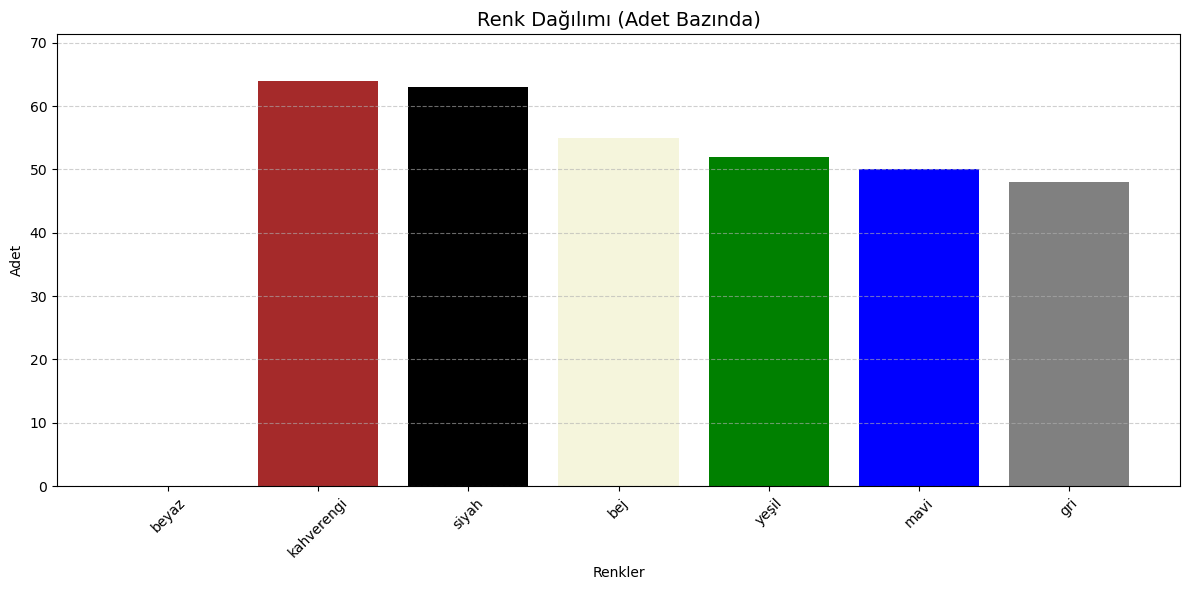

In [252]:
plt.figure(figsize=(12, 6))
bars = plt.bar(renk_df['Renk'], renk_df['Adet'], color=[np.array(color_palette.get(renk, (150, 150, 150))) / 255 for renk in renk_df['Renk']])
plt.title('Renk Daƒüƒ±lƒ±mƒ± (Adet Bazƒ±nda)', fontsize=14)
plt.xlabel('Renkler')
plt.ylabel('Adet')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [253]:
stil_renkleri = {}
for idx, row in df.iterrows():
    stiller = str(row['Stil √ñnerisi']).lower()
    renkler = row['renkler_genis']
    for renk in renkler:
        if renk not in stil_renkleri:
            stil_renkleri[renk] = []
        stil_renkleri[renk].append(stiller)
from collections import defaultdict

renk_stil_keywords = {}

for renk, stiller_listesi in stil_renkleri.items():
    tokenler = []
    for stil in stiller_listesi:
        tokenler.extend(tokenize(stil))
        stop_words = set(stopwords.words('turkish'))
    tokenler = [tok for tok in tokenler if tok not in stop_words]
    
    renk_stil_keywords[renk] = Counter(tokenler).most_common(5)
renk_stil_keywords


{'beyaz': [('topuklu', 21),
  ('ofise', 13),
  ('uygun', 13),
  ('blazer', 13),
  ('kombin', 12)],
 'kahverengi': [('topuklu', 21),
  ('ofise', 17),
  ('uygun', 17),
  ('g√∂mlek', 11),
  ('blazer', 11)],
 'mavi': [('kombin', 17),
  ('≈üƒ±k', 14),
  ('blazer', 13),
  ('ceketle', 11),
  ('topuklu', 10)],
 'bej': [('topuklu', 12),
  ('bir', 12),
  ('kuma≈ü', 11),
  ('pantolonla', 11),
  ('zarif', 11)],
 'ye≈üil': [('topuklu', 15),
  ('ofise', 12),
  ('uygun', 12),
  ('blazer', 12),
  ('≈üƒ±k', 11)],
 'gri': [('topuklu', 17),
  ('ofise', 14),
  ('uygun', 14),
  ('blazer', 11),
  ('kombin', 10)],
 'siyah': [('topuklu', 19),
  ('ofise', 17),
  ('uygun', 17),
  ('kombin', 13),
  ('sneaker', 12)]}

In [254]:
pd.DataFrame([
    {"Renk": renk, "ƒ∞li≈ükili Stil Kelimeleri": ', '.join([kelime for kelime, _ in kelimeler])}
    for renk, kelimeler in renk_stil_keywords.items()
]).sort_values(by="Renk").reset_index(drop=True)


Renk                ƒ∞li≈ükili Stil Kelimeleri
0         bej  topuklu, bir, kuma≈ü, pantolonla, zarif
1       beyaz   topuklu, ofise, uygun, blazer, kombin
2         gri   topuklu, ofise, uygun, blazer, kombin
3  kahverengi   topuklu, ofise, uygun, g√∂mlek, blazer
4        mavi   kombin, ≈üƒ±k, blazer, ceketle, topuklu
5       siyah  topuklu, ofise, uygun, kombin, sneaker
6       ye≈üil      topuklu, ofise, uygun, blazer, ≈üƒ±k